In [430]:
# Surpressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Importing necessary libraries

In [431]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor, VotingClassifier,VotingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
import seaborn as sns

Load the Weather dataset

In [432]:
df = pd.read_csv('Weather_Data.csv')
df.head()

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
0,01-02-13,20.7,20.9,19.5,22.4,15.6,Yes,6.2,0.0,W,...,S,SSW,17,20,92,84,1017.6,1017.4,8,8
1,02-02-13,22.4,24.8,19.5,25.6,6.0,Yes,3.4,2.7,W,...,W,E,9,13,83,73,1017.9,1016.4,7,7
2,03-02-13,23.5,23.0,21.6,24.5,6.6,Yes,2.4,0.1,W,...,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8
3,04-02-13,21.4,20.9,20.2,22.8,18.8,Yes,2.2,0.0,W,...,NNE,E,22,20,83,90,1014.2,1011.8,8,8
4,05-02-13,22.5,25.5,19.7,25.7,77.4,Yes,4.8,0.0,W,...,NNE,W,11,6,88,74,1008.3,1004.8,8,8


#**Data Analysis**


Feature Distribution

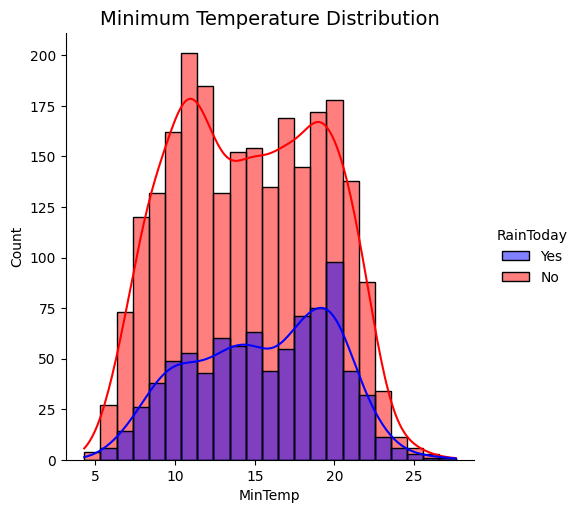

In [433]:
sns.displot(df, x="MinTemp", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

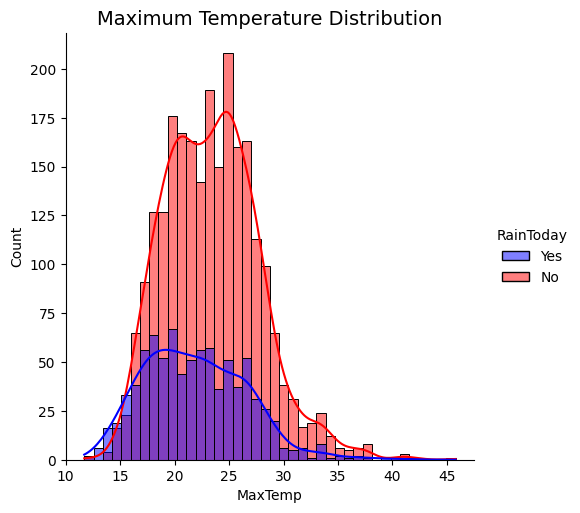

In [434]:
sns.displot(df, x="MaxTemp", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

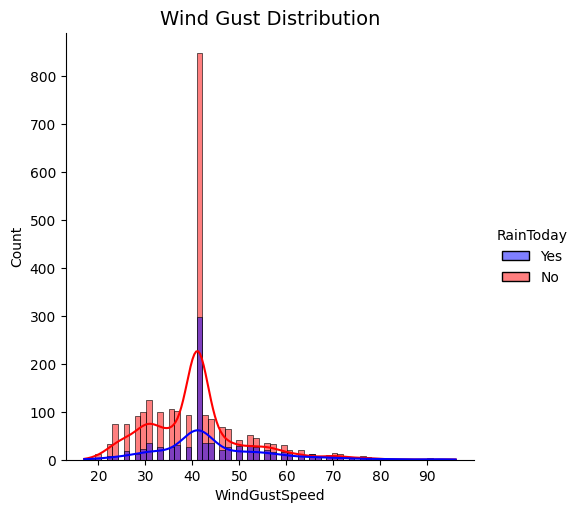

In [435]:
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

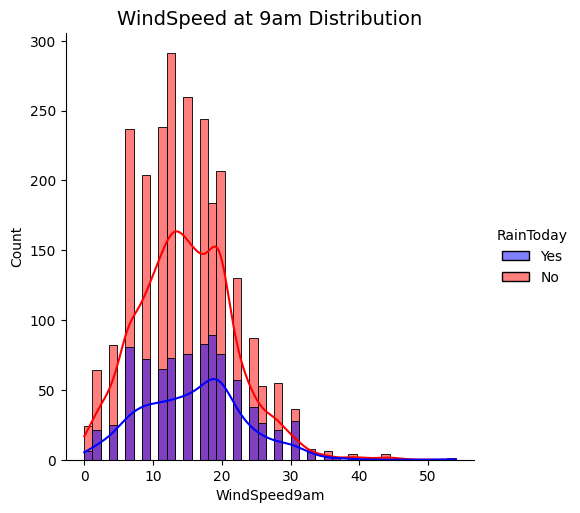

In [436]:
sns.displot(df, x="WindSpeed9am", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

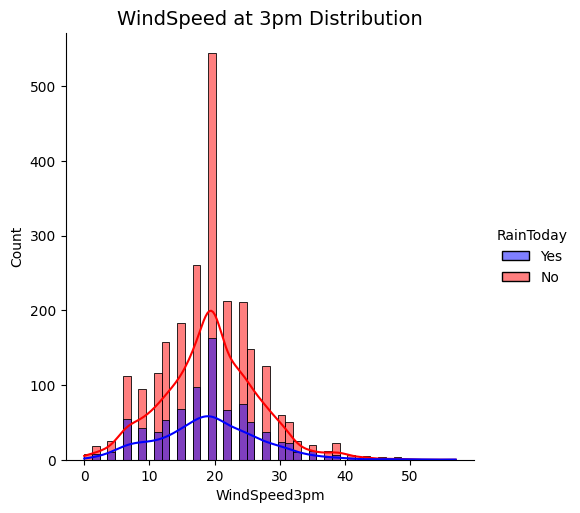

In [437]:
sns.displot(df, x="WindSpeed3pm", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

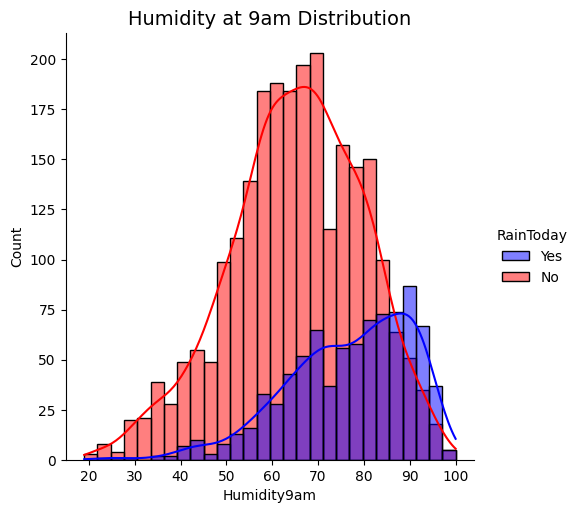

In [438]:
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

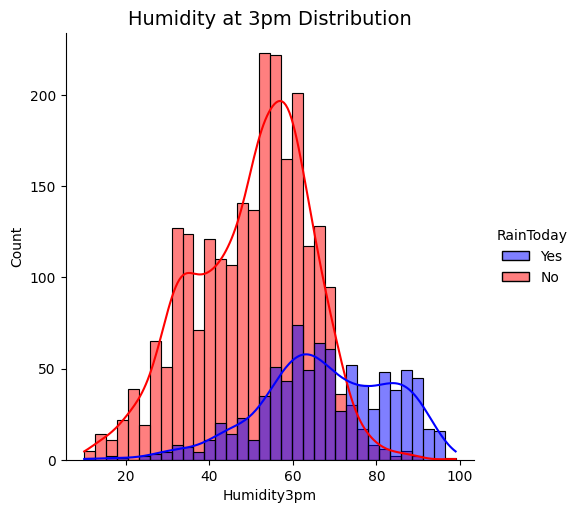

In [439]:
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

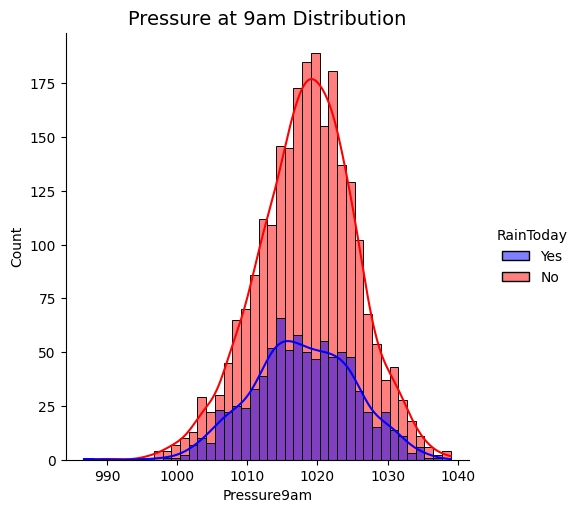

In [440]:
sns.displot(df, x="Pressure9am", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

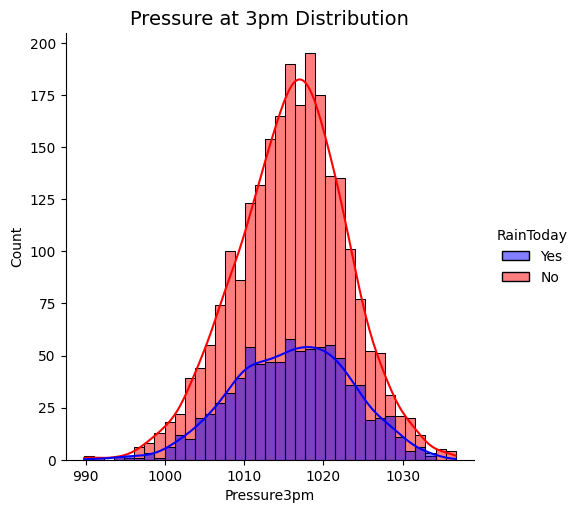

In [441]:
sns.displot(df, x="Pressure3pm", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

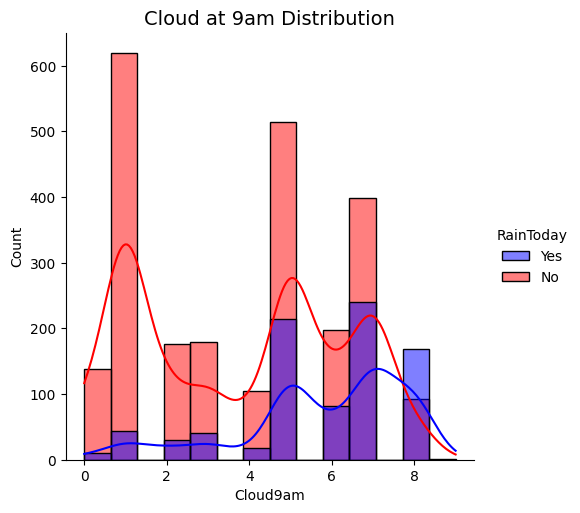

In [442]:
sns.displot(df, x="Cloud9am", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

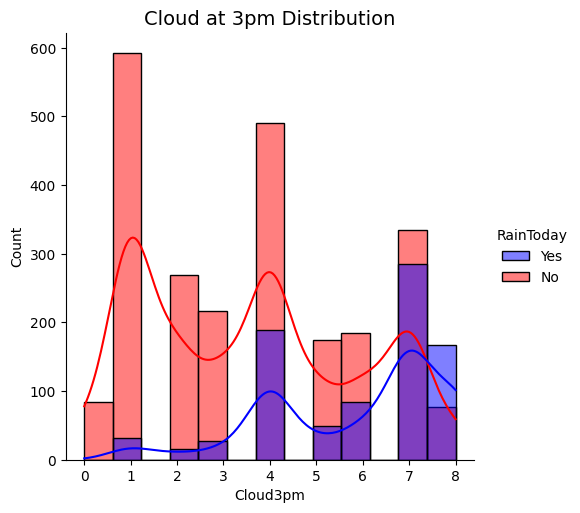

In [443]:
sns.displot(df, x="Cloud3pm", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

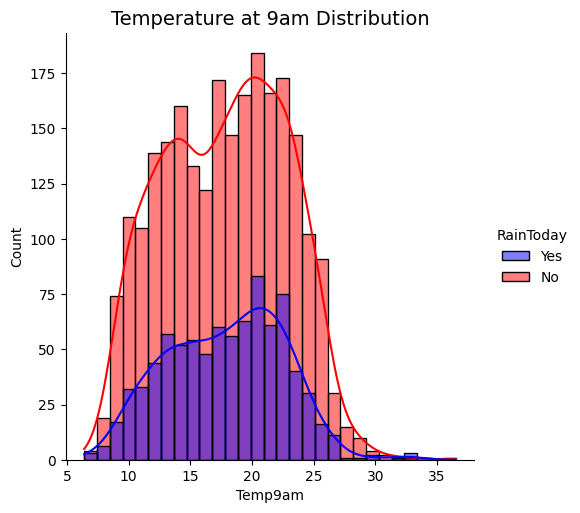

In [444]:
sns.displot(df, x="Temp9am", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

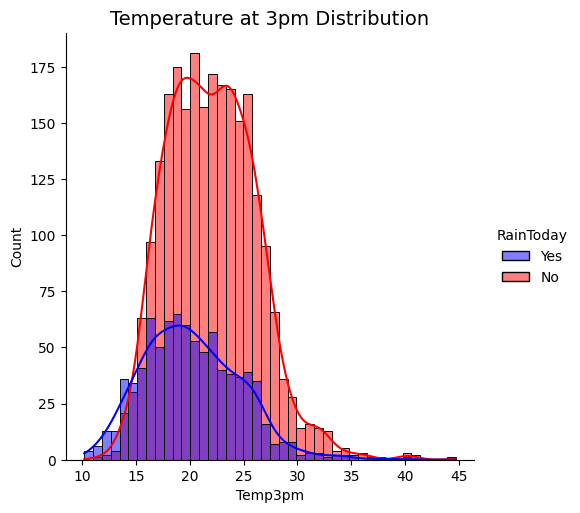

In [445]:
sns.displot(df, x="Temp3pm", hue='RainToday', kde=True, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

EDA

Average WindSpeed Analysis

In [446]:
windspeed_weather_df = df.groupby(df['Date'].str[3:5])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df

,Date,WindSpeed9am,WindSpeed3pm
0,01,15.285171,17.403042
1,02,15.468504,18.228346
2,03,15.989247,18.053763
3,04,16.466667,19.396296
4,05,16.580645,18.419355
5,06,15.077778,18.807407
6,07,14.612903,20.229391
7,08,13.645161,20.114695
8,09,13.818519,21.203704
9,10,13.896057,21.007168


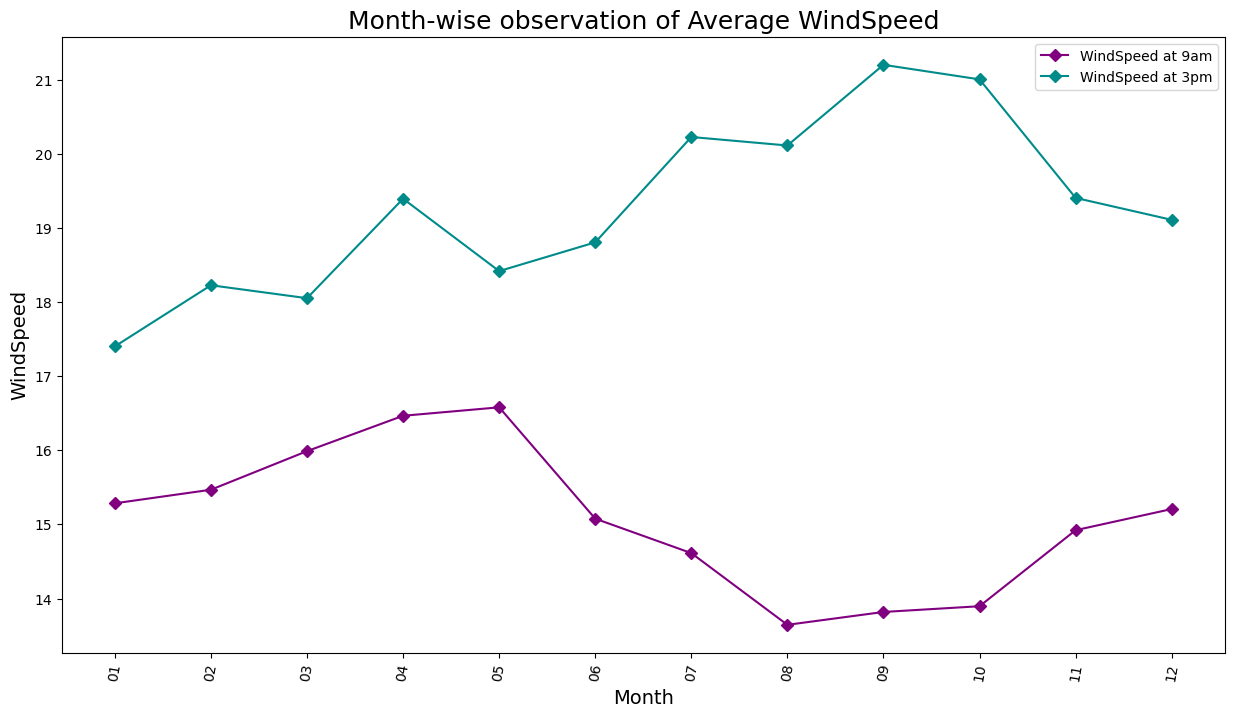

In [447]:
x = windspeed_weather_df.loc[:, 'Date']
y1 = windspeed_weather_df['WindSpeed9am']
y2 = windspeed_weather_df['WindSpeed3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='D', color = 'purple', label = 'WindSpeed at 9am')
plt.plot(x, y2, marker='D', color = 'darkcyan', label = 'WindSpeed at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('WindSpeed', fontsize = 14)
plt.title('Month-wise observation of Average WindSpeed', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Average Humidity Analysis

In [448]:
humidity_weather_df = df.groupby(df['Date'].str[3:5])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df

,Date,Humidity9am,Humidity3pm
0,01,73.574144,57.136882
1,02,72.830709,56.468504
2,03,68.519713,52.698925
3,04,67.285185,52.374074
4,05,64.014337,49.906810
5,06,66.433333,54.000000
6,07,65.179211,52.333333
7,08,64.164875,52.867384
8,09,65.844444,56.100000
9,10,71.197133,59.139785


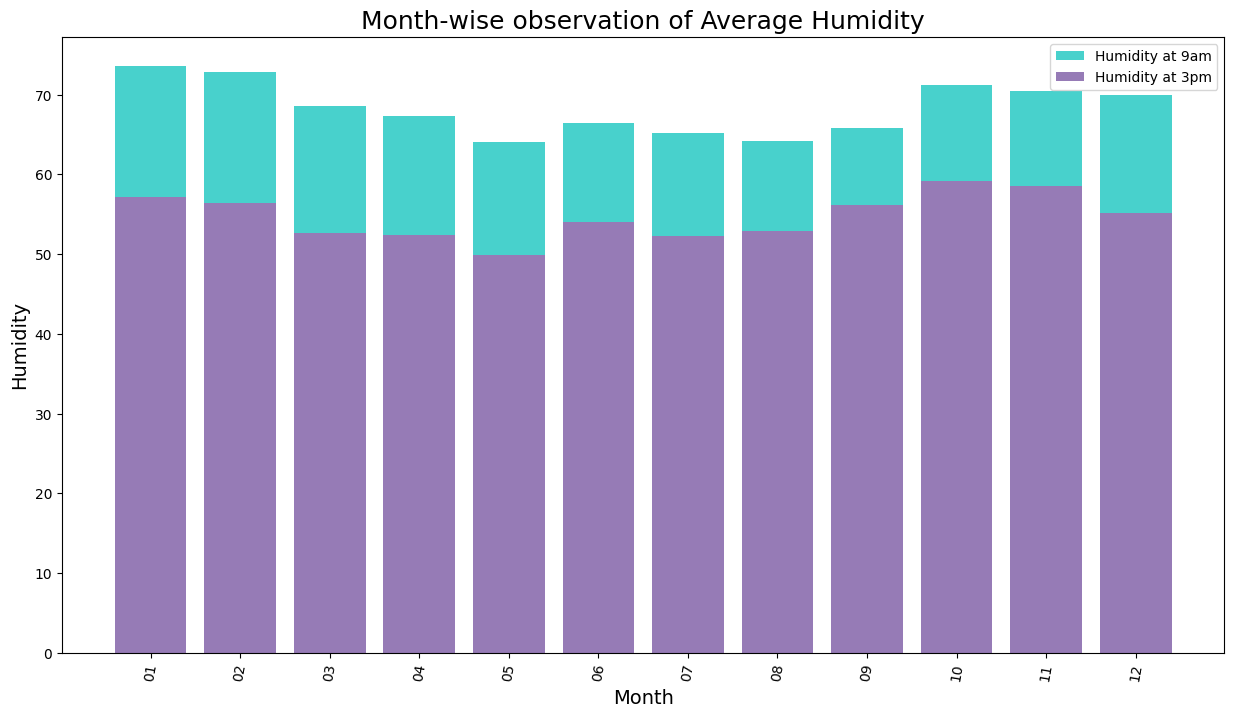

In [490]:
x = humidity_weather_df.loc[:, 'Date']
y1 = humidity_weather_df['Humidity9am']
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize = (15, 8))

plt.bar(x, y1, color = '#48D1CC', label = 'Humidity at 9am')
plt.bar(x, y2, color = '#967bb6',label = 'Humidity at 3pm')


plt.xlabel('Month', fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title('Month-wise observation of Average Humidity', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Average Pressure Analysis

In [450]:
pressure_weather_df = df.groupby(df['Date'].str[3:5])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df

,Date,Pressure9am,Pressure3pm
0,01,1019.358175,1017.123574
1,02,1018.531496,1016.374803
2,03,1020.687097,1018.254122
3,04,1020.229630,1017.622222
4,05,1019.886738,1017.269391
5,06,1018.396667,1015.952593
6,07,1017.147670,1014.789964
7,08,1015.941577,1013.565789
8,09,1016.675556,1014.475100
9,10,1018.082079,1016.032258


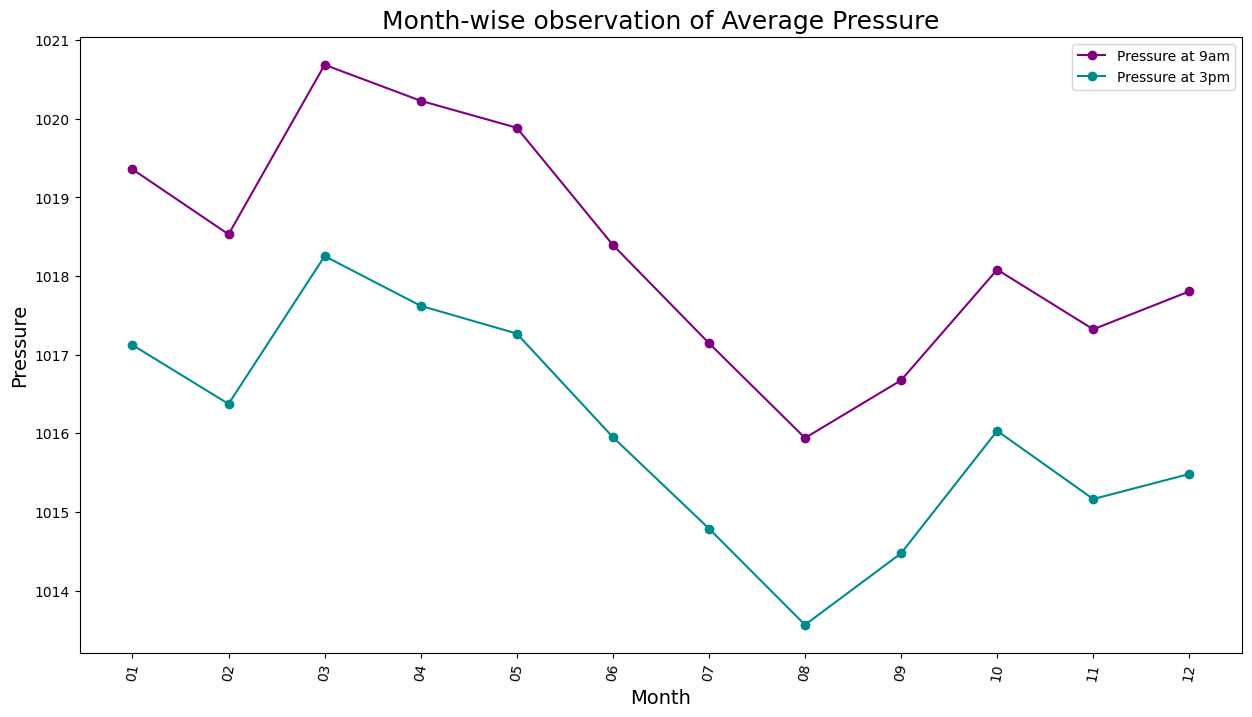

In [451]:
x = pressure_weather_df.loc[:, 'Date']
y1 = pressure_weather_df['Pressure9am']
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, marker='o', color = 'purple', label = 'Pressure at 9am')
plt.plot(x, y2, marker='o', color = 'darkcyan', label = 'Pressure at 3pm')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Pressure', fontsize = 14)
plt.title('Month-wise observation of Average Pressure', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Average Temperature Analysis

In [452]:
location_weather_df = df.groupby(df['Date'].str[3:5])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df

,Date,MinTemp,MaxTemp,Temp9am,Temp3pm
0,01,14.851331,22.621673,17.158555,21.422814
1,02,14.154331,21.984252,16.439764,20.783858
2,03,12.713620,21.339068,15.451971,20.127599
3,04,12.600000,21.145926,15.721111,19.736667
4,05,12.651971,21.878495,15.939785,20.335125
5,06,13.621852,22.000741,16.786296,20.429259
6,07,14.223297,22.521505,17.465591,20.882437
7,08,15.870251,24.025090,19.237276,22.390323
8,09,17.608148,25.315926,21.029630,23.648889
9,10,17.709319,24.853047,20.483154,23.400000


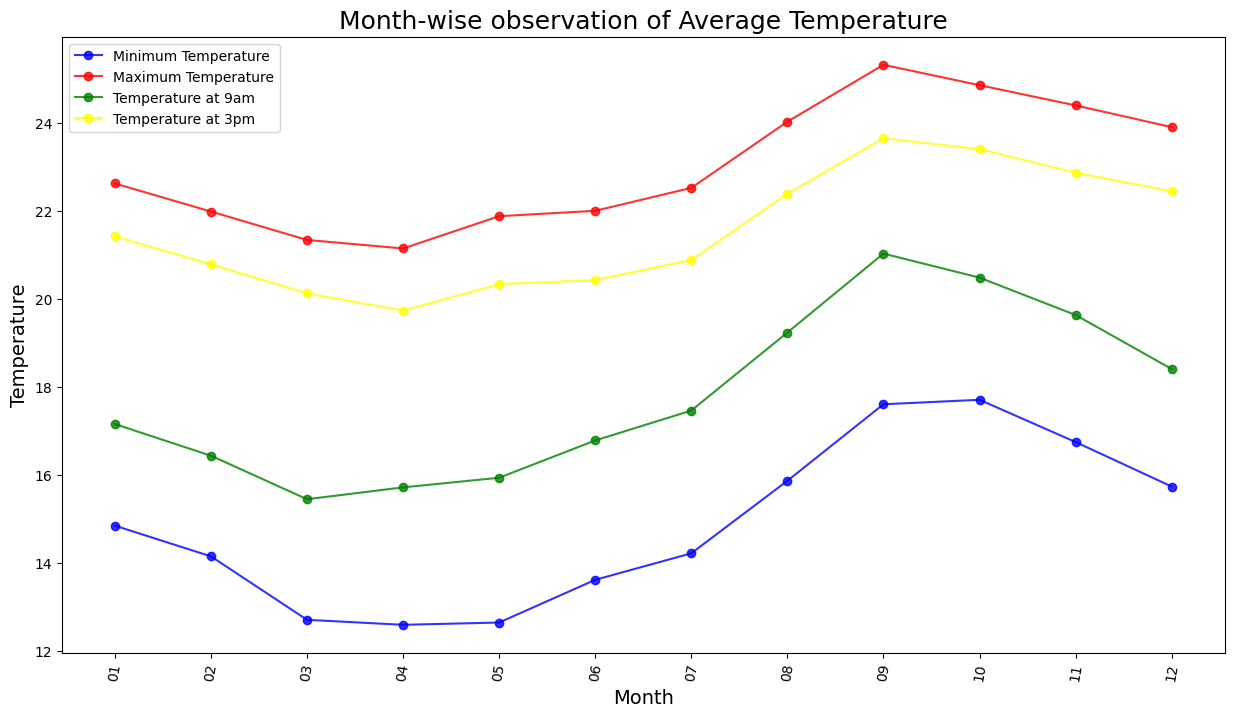

In [491]:
x = location_weather_df.loc[:, 'Date']
y1 = location_weather_df['MinTemp']
y2 = location_weather_df['MaxTemp']
y3 = location_weather_df['Temp9am']
y4 = location_weather_df['Temp3pm']

plt.figure(figsize = (15, 8))

plt.plot(x, y1, label = 'Minimum Temperature', marker='o', alpha = 0.8, color='blue')
plt.plot(x, y2, label = 'Maximum Temperature', marker='o', alpha = 0.8, color='red')
plt.plot(x, y3, label = 'Temperature at 9am', marker='o', alpha = 0.8, color='green')
plt.plot(x, y4, label = 'Temperature at 3pm', marker='o', alpha = 0.8, color='yellow')

plt.xlabel('Month', fontsize = 14)
plt.ylabel('Temperature', fontsize = 14)
plt.title('Month-wise observation of Average Temperature', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=80)
plt.show()

Correlation and Description of the data

In [454]:
df.describe()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,17.821461,21.543656,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093
std,4.894316,4.297053,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274
min,6.400000,10.200000,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000
25%,13.800000,18.400000,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000
50%,18.200000,21.300000,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000
75%,21.700000,24.500000,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000
max,36.500000,44.700000,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000


In [455]:
bf=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [456]:
bf.corr()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
Temp9am,1.000000,0.828457,0.939307,0.858639,-0.054297,0.606122,0.113891,0.159570,-0.334084,0.280009,-0.145944,0.131855,-0.417437,-0.401353,0.093204,0.068683
Temp3pm,0.828457,1.000000,0.753147,0.960805,-0.142748,0.474599,0.345528,0.036216,-0.351836,0.136713,-0.155192,-0.212696,-0.342862,-0.387945,-0.086544,-0.144965
MinTemp,0.939307,0.753147,1.000000,0.771005,0.013995,0.569316,-0.063475,0.127792,-0.298040,0.225905,0.053946,0.273269,-0.391654,-0.353334,0.241248,0.164028
MaxTemp,0.858639,0.960805,0.771005,1.000000,-0.139306,0.510334,0.327422,0.073184,-0.349382,0.155542,-0.185382,-0.150741,-0.385853,-0.420375,-0.084695,-0.099217
Rainfall,-0.054297,-0.142748,0.013995,-0.139306,1.000000,-0.110343,-0.308962,0.149811,0.153696,0.039415,0.332636,0.305635,-0.037561,0.001780,0.245231,0.200999
Evaporation,0.606122,0.474599,0.569316,0.510334,-0.110343,1.000000,0.175932,0.245426,-0.077532,0.292469,-0.395651,-0.102295,-0.343581,-0.298303,-0.037051,-0.038422
Sunshine,0.113891,0.345528,-0.063475,0.327422,-0.308962,0.175932,1.000000,-0.029032,-0.058410,0.177813,-0.490631,-0.586476,-0.047789,-0.094507,-0.665014,-0.677861
WindGustSpeed,0.159570,0.036216,0.127792,0.073184,0.149811,0.245426,-0.029032,1.000000,0.256460,0.509825,-0.225613,-0.095037,-0.408876,-0.351850,0.024275,0.044016
WindSpeed9am,-0.334084,-0.351836,-0.298040,-0.349382,0.153696,-0.077532,-0.058410,0.256460,1.000000,0.197669,-0.189763,-0.148849,0.003737,0.091878,-0.062441,-0.018030
WindSpeed3pm,0.280009,0.136713,0.225905,0.155542,0.039415,0.292469,0.177813,0.509825,0.197669,1.000000,-0.288910,-0.135039,-0.333810,-0.277749,-0.050932,-0.095435


<Axes: >

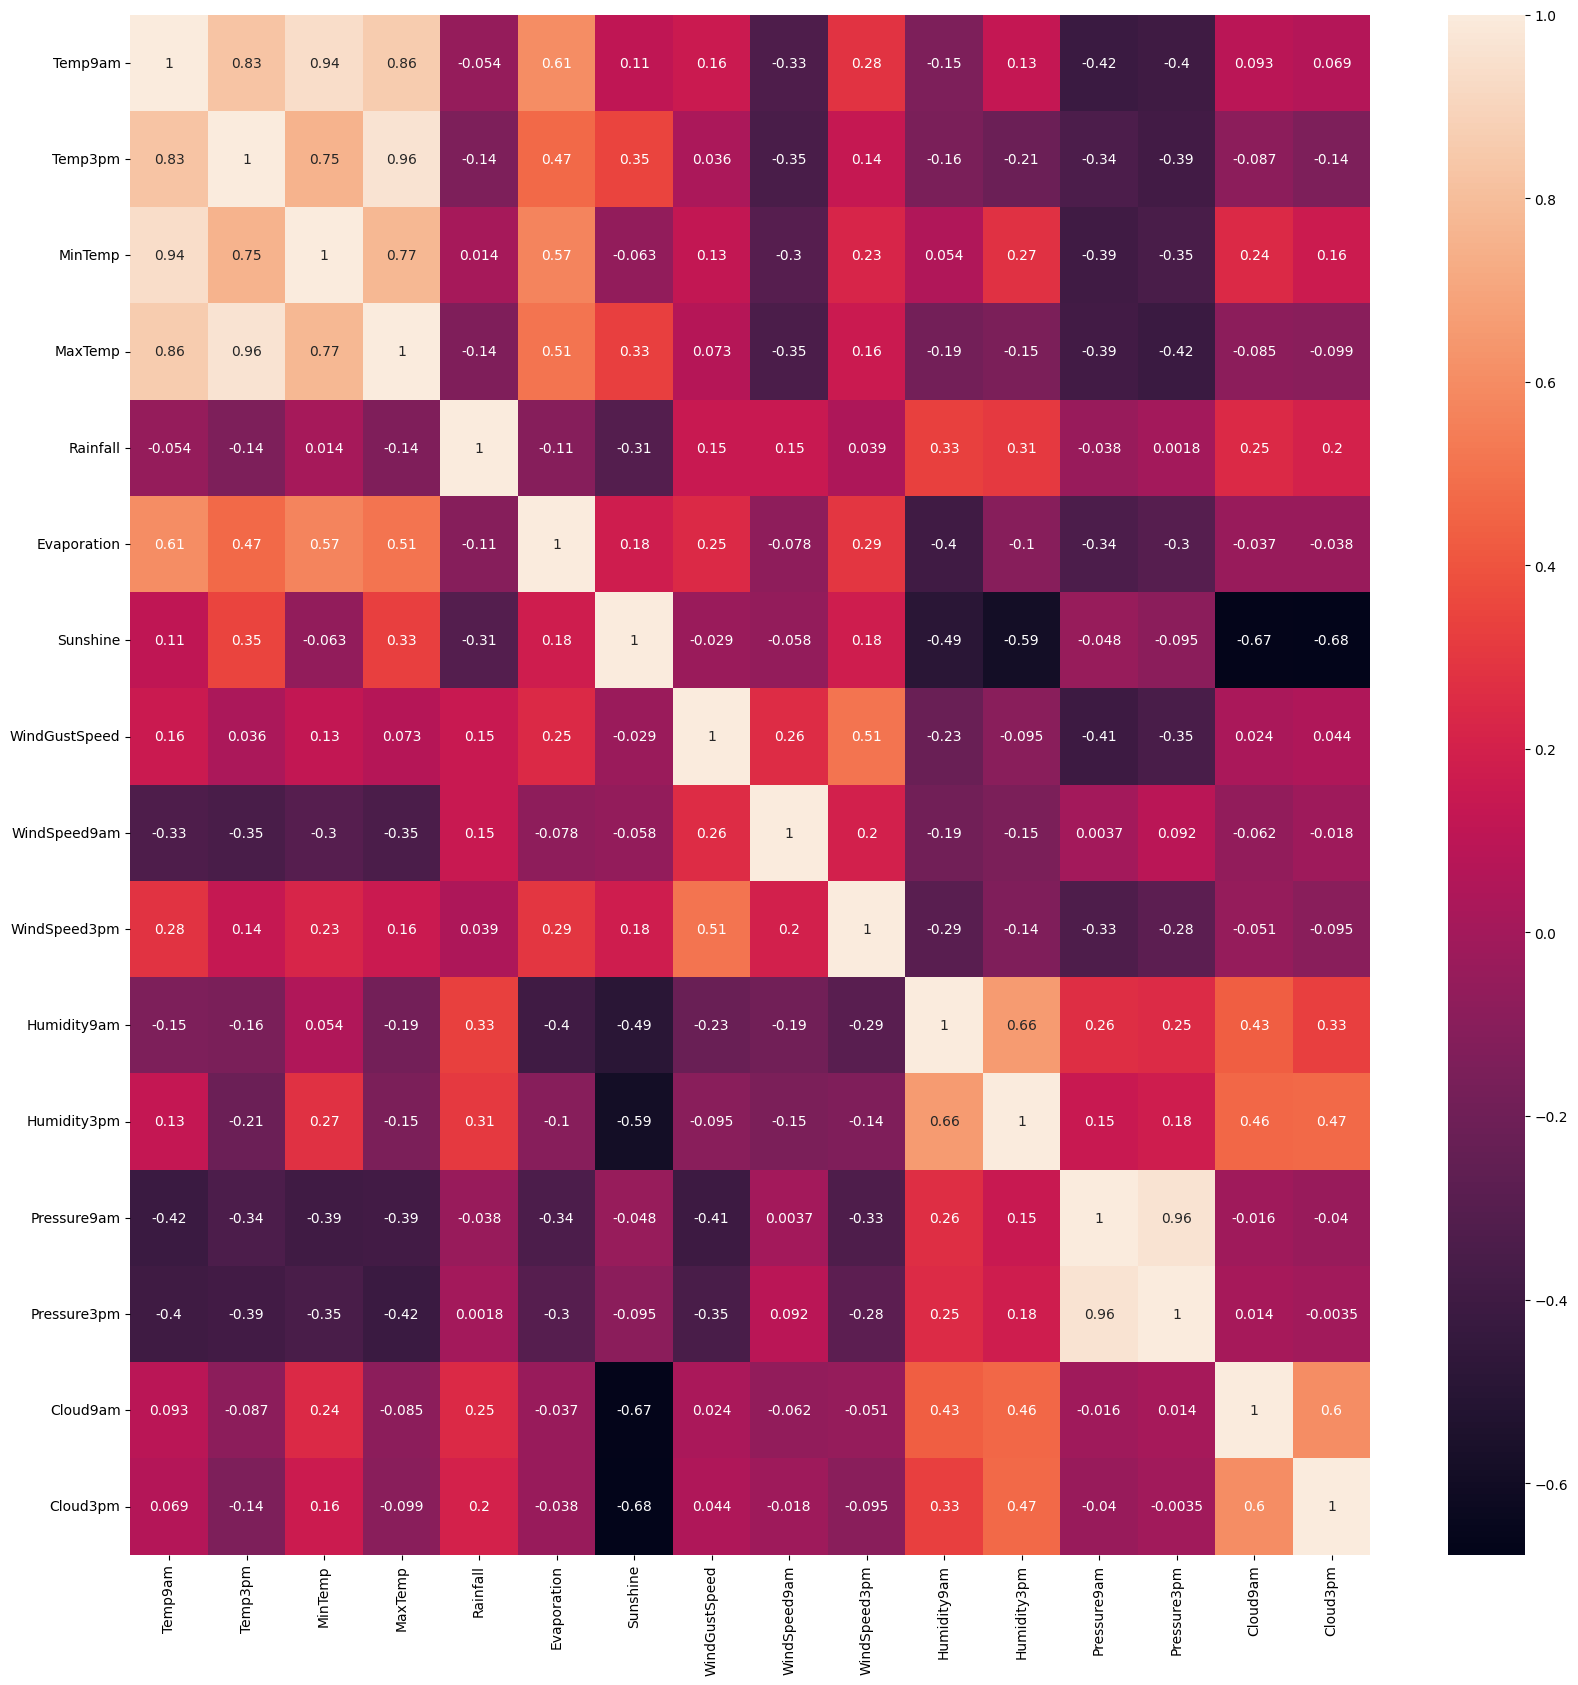

In [457]:
plt.figure(figsize=(20, 20))
sns.heatmap(bf.corr(), annot=True)

#**Data Preprocessing**

Standardize the Variables

In [458]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(bf)

StandardScaler()

In [459]:
scaled_features = scaler.transform(bf)

In [460]:
df_feat = pd.DataFrame(scaled_features,columns=bf.columns[:16])
selected_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']]
df_feat[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']] = selected_columns.copy()
df_feat.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Date,RainToday,WindGustDir,WindDir9am,WindDir3pm
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,1.800202,-0.104633,0.199024,1.457110,1.586088,01-02-13,Yes,W,S,SSW
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,1.124391,-0.061892,0.056550,1.061312,1.171306,02-02-13,Yes,W,W,E
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,1.923076,-0.232857,-0.057429,1.061312,1.586088,03-02-13,Yes,W,ESE,ESE
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,2.168826,-0.589032,-0.598829,1.457110,1.586088,04-02-13,Yes,W,NNE,E
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,1.185828,-1.429605,-1.596144,1.457110,1.586088,05-02-13,Yes,W,NNE,W


Transforming Categorical Variables

In [461]:
df_proc = pd.get_dummies(data=df_feat, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc.head()

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.588229,-0.149813,1.015126,-0.135078,1.236139,0.371460,-1.878965,-0.044081,0.273041,0.094683,...,False,False,False,False,False,True,False,False,False,False
1,0.935624,0.757924,1.015126,0.578719,0.268029,-0.644040,-1.171303,-0.044081,-0.862879,-0.844638,...,False,False,False,False,False,False,False,False,False,False
2,1.160409,0.338969,1.476258,0.333351,0.328536,-1.006719,-1.852755,-0.044081,0.273041,-2.320714,...,False,False,False,False,False,False,False,False,False,False
3,0.731274,-0.149813,1.168837,-0.045853,1.558843,-1.079254,-1.878965,-0.044081,0.982991,0.094683,...,False,False,False,False,False,False,False,False,False,False
4,0.956059,0.920852,1.059043,0.601025,7.468346,-0.136290,-1.878965,-0.044081,-0.578899,-1.783959,...,False,False,False,False,False,False,False,True,False,False


In [462]:
df_proc.replace(['No', 'Yes'], [0,1], inplace=True)
df_proc[['Date','RainToday']]

,Date,RainToday
0,01-02-13,1
1,02-02-13,1
2,03-02-13,1
3,04-02-13,1
4,05-02-13,1
...,...,...
3266,11-01-22,0
3267,12-01-22,0
3268,13-01-22,0
3269,14-01-22,0


In [463]:
df_proc.drop('Date',axis=1,inplace=True)

#**Rainfall Occurance Prediction**

Training Data and Test Data

In [464]:
df_proc = df_proc.astype(float)

In [465]:
features = df_proc.drop(columns='RainToday', axis=1)
Y = df_proc['RainToday']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

Logistic Regression Model

In [466]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

KNN Classification Model

In [467]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Decision Tree Classification Model

In [468]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

SVM Classification Model

In [469]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

Random Forest Classification Model

In [470]:
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)

RandomForestClassifier()

#**LSTM**

In [471]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import f1_score

# Assuming 'df' is your DataFrame
# Select numerical features, excluding 'Date'
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = numerical_features[numerical_features != 'Date']

# Scale numerical features
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[numerical_features])

# Prepare data for LSTM
X = scaled_df.reshape(scaled_df.shape[0], 1, scaled_df.shape[1])  # Reshape to 3D
y = LabelEncoder().fit_transform(df['RainToday'])  # Encode target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1) # Reduced epochs for faster training

# Evaluate model and calculate F1 score
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary)
print(f"LSTM F1 Score: {f1:.4f}")

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7403 - loss: 0.6474 - val_accuracy: 0.7309 - val_loss: 0.5741
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7397 - loss: 0.5545 - val_accuracy: 0.7290 - val_loss: 0.5086
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7722 - loss: 0.4770 - val_accuracy: 0.8015 - val_loss: 0.4522
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8120 - loss: 0.4215 - val_accuracy: 0.8015 - val_loss: 0.4256
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.4010 - val_accuracy: 0.8263 - val_loss: 0.4156
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8158 - loss: 0.3982 - val_accuracy: 0.8302 - val_loss: 0.4087
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8240 - loss: 0.3974 - val_accuracy: 0.8263 - val_loss: 0.4040
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8255 - loss: 0.3865 - val_accuracy: 0.8321 - val_loss:

Classification Report on Ranfall Occurance Prediction

In [472]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)  # Use the same split for all modelsLR_Accuracy_Score = metrics.accuracy_score(LR.predict(x_test), y_test)
LR_Accuracy_Score = metrics.accuracy_score(LR.predict(x_test), y_test)  # Remove .values here
KNN_Accuracy_Score = metrics.accuracy_score(KNN.predict(x_test), y_test)
Tree_Accuracy_Score = metrics.accuracy_score(Tree.predict(x_test), y_test)
SVM_Accuracy_Score = metrics.accuracy_score(SVM.predict(x_test), y_test)
RFC_Accuracy_Score = metrics.accuracy_score(RFC.predict(x_test), y_test)
lstm_accuracy = accuracy

LR_F1_Score=metrics.f1_score(LR.predict(x_test),y_test)
KNN_F1_Score=metrics.f1_score(KNN.predict(x_test.values),y_test,average='weighted')
Tree_F1_Score=metrics.f1_score(Tree.predict(x_test.values),y_test)
SVM_F1_Score=metrics.f1_score(SVM.predict(x_test.values),y_test)
RFC_F1_Score=metrics.f1_score(RFC.predict(x_test.values),y_test)
lstm_f1 = f1


Report = {'Classification Algorithm': ['Logistic Regression','KNN', 'Decision Tree',  'SVM','Random Forest', 'LSTM'],
          'Accuracy Score': [LR_Accuracy_Score,KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score, RFC_Accuracy_Score, lstm_accuracy],
          'F1-score': [LR_F1_Score,KNN_F1_Score, Tree_F1_Score, SVM_F1_Score, RFC_F1_Score, lstm_f1],}
Report = pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy Score,F1-score
0,Logistic Regression,0.822707,0.617702
1,KNN,0.800000,0.825270
2,Decision Tree,0.765939,0.569132
3,SVM,0.828821,0.618677
4,Random Forest,0.826201,0.604374
5,LSTM,0.809160,0.622356


In [473]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score', marker_color='#967bb6'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score', marker_color='#48D1CC'), row=1,col=1
)
fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()

#**Rainfall Amount Prediction**

Training Data and Test Data

In [474]:
df_proc = df_proc.astype(float)
features = df_proc.drop(columns='Rainfall', axis=1)
Y = df_proc['Rainfall']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

Linear Regression

In [475]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

Random Forest Regression Model

In [476]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

SVM Regression Model

In [477]:
# Assuming 'features' and 'Y' are defined correctly before this point
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

# Ensure that you are using the same x_train and y_train for SVR:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(x_train, y_train)

SVR()

**LSTM**

In [478]:

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame and 'Rainfall' is the target variable
# Select numerical features for LSTM
numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = numerical_features[numerical_features != 'Date']

# Scale numerical features
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[numerical_features])

# Prepare data for LSTM
X = scaled_df.reshape(scaled_df.shape[0], 1, scaled_df.shape[1])  # Reshape to 3D
y = df['Rainfall']  # Use 'Rainfall' as target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1)) # Output layer for regression
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1) # Reduced epochs

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 84.2250
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 83.6472
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 84.9193
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 77.5334
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 58.9076
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.5308
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 59.8968
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 44.7531
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 65.0942
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 52.0717
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 61.8337
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 45.3529
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.7242
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 50.6832
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 37.3363


Regression report on rainfall amount prediction

In [479]:
# Assuming 'features' and 'Y' are defined as in your previous cells for Rainfall Amount Prediction
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

# Retrain the Linear Regression model with the correct x_train and y_train
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

# Now calculate the metrics
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test) ** 0.5

# Instead of dropping temperature columns, include them for rainfall prediction:
features = df_proc.drop(columns=['Rainfall'], axis=1)  # Include temperature columns
# Now, re-split the data using the updated features and retrain RFR
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)
RFR = RandomForestRegressor()  # Re-initialize RFR
RFR.fit(x_train, y_train)  # Re-train RFR with the updated features

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test) ** 0.5 # Calculate RMSE

# Retrain SVRR with the updated features:
# The SVRR model needs to be retrained with the updated features
# to avoid the ValueError due to the feature mismatch.
SVRR = svm.SVR()  # Create a new instance of the SVR class using svm.SVR()
SVRR.fit(x_train, y_train) # Retrain with the updated x_train and y_train
SVM_MAE = metrics.mean_absolute_error(SVRR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVRR.predict(x_test), y_test) ** 0.5

lstm_MAE = mae
lstm_MSE = mse ** 0.5 # Calculate RMSE



Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM', 'LSTM' ],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE,lstm_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE,lstm_MSE]}
Report = pd.DataFrame(Report)
Report

,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.498773,0.948272
1,Random Forest,0.380248,0.894005
2,SVM,0.365070,0.971967
3,LSTM,0.287220,0.521391


In [480]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE', marker_color='#967bb6'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE', marker_color='#48D1CC'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()


#**Average Temperature of a day Prediction**

Training Data and Test Data

In [481]:
df_proc = df_proc.astype(float)
df_proc['AvgTemp']=df_proc[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
features = df_proc.drop(columns=['Temp9am', 'Temp3pm','MinTemp','MaxTemp','AvgTemp'], axis=1)
Y = df_proc['AvgTemp']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

Linear Regression

In [482]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

Random Forest Regression Model

In [483]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

SVM Regression Model

In [484]:
# Assuming 'features' and 'Y' are defined correctly before this point
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

# Ensure that you are using the same x_train and y_train for SVR:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(x_train, y_train)

SVR()

**LSTM**

In [485]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'df' is your DataFrame and 'AvgTemp' is the target variable
# Select numerical features for LSTM, excluding the target variable and 'Date'

# Calculate 'AvgTemp' if it doesn't exist in the DataFrame
if 'AvgTemp' not in df.columns:
    df['AvgTemp'] = df[['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp']].mean(axis=1)

numerical_features = df.select_dtypes(include=['number']).columns
numerical_features = numerical_features[~numerical_features.isin(['Date', 'AvgTemp'])]

# Scale numerical features
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df[numerical_features])

# Prepare data for LSTM
X = scaled_df.reshape(scaled_df.shape[0], 1, scaled_df.shape[1])  # Reshape to 3D
y = df['AvgTemp']  # Use 'AvgTemp' as the target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1)) # Output layer for regression
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1) # Reduced epochs

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 387.2422
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 264.7656
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.0692
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.4616
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1706
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1956
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1431
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8995
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.3818
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4403
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.8415
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0515
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5784
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2412
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9185
Epoch 16/50
8

Regression report on average temperature prediction

In [486]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101) # This line is crucial to ensure the correct data split

LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test) ** 0.5 # Calculate RMSE by taking the square root of MSE

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test) ** 0.5 # Calculate RMSE by taking the square root of MSE

SVM_MAE = metrics.mean_absolute_error(SVR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVR.predict(x_test), y_test) ** 0.5 # Calculate RMSE by taking the square root of MSE

# Assuming 'mae' and 'mse' are calculated correctly in the LSTM section
# with the SAME x_test, y_test from above for consistency
lstm_MAE = mae
lstm_MSE = mse ** 0.5 # Calculate RMSE by taking the square root of MSE


Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM','LSTM'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE,lstm_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE, lstm_MSE]}
Report = pd.DataFrame(Report)
Report

,Regression Algorithm,MAE,RMSE
0,Linear Regression,0.470605,0.603224
1,Random Forest,0.447257,0.568197
2,SVM,0.434701,0.560317
3,LSTM,0.128646,0.177491


In [487]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE', marker_color='#967bb6'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE',  marker_color='#48D1CC'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()